# Logistic Regression Analysis

### Libraries

We utilize both external libraries, like numpy and scikit-learn, as well as internally written libraries for the sake of modularity and simplicity of code within this notebook. The goal for modularizing the code base is so that running the different algorithms here can be clean and require as few parameters and extraneous code blocks as possible, enabling us to focus on analysis.

In [1]:
# External libraries:
import numpy as np
from sklearn.model_selection import train_test_split

# Internal libraries:
import datasets.data as data
from descent_algorithms import *
from learning_rates import *
from models import *
from util import *

Using TensorFlow backend.


### Data
We use three different datasets for our analysis of our algorithms, all of which provide a binary classification problem (??? 0 or 1 ???). (DESCRIPTION OF THREE DATASETS HERE AND HOW THEY ARE PREPPED IN THE data.py FILE)

Here, we read in the data vectors and labels using the datasets/data utility functions, and then perform a train/test split of 80%/20% of the provided samples. The splitting is done using the train_test_split function from the sklearn.model_selection package, which randomizes the splits.

In [22]:
features, labels = data.load_wisconsin_breast_cancer()
wbc_X_train, wbc_X_test, wbc_y_train, wbc_y_test = train_test_split(
    features, labels, test_size=0.2)
wbc_n = wbc_X_train.shape[0]

M_features, M_labels = data.load_MNIST_13()
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(
    M_features, M_labels, test_size = 0.2)
mnist_n = mnist_X_train.shape[0]

cod_features, cod_labels = data.load_cod_rna()
cod_X_train, cod_X_test, cod_y_train, cod_y_test = train_test_split(
    cod_features, cod_labels, test_size = 0.2)
cod_n = cod_X_train.shape[0]

### Comparative Measures
We use a relative convergence measure of 0.000001 (1/10000% change in loss between iterations), in order to determine whether or not an algorithm has converged. This allows us to directly compare the various descent methods and learning rates (?? and regularizations ??) for convergence rate.

Additionally, we keep track of the final loss converged too, the resultant test accuracy, and the time per iteration in order to fully compare the relative performance of the all of the algorithms.

In [32]:
# relative convergence limit
rel_conv = 0.000001

### Fixed Step Size
We begin our analysis with a look at the fixed learning rate convergence for our GD, SGD, AGD, and SVRG algorithms on our three datasets.

The default learning rate for fixed is set to 0.01.

In [37]:
# initialize our learning rate object
lr = FixedRate()

#### Wisconsin Breast Cancer Data
Then, we setup the run for all of our descent methods on the Wisconsin Breast Cancer dataset, beginning with the initialization of each of our descent method objects.

In [50]:
# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent() # the GD algorithm is used for all SGD algorithms, 
                          # with the smaller batch size specified in the model
sgd_10 = GradientDescent()
sgd_100 = GradientDescent()
agd = NesterovAcceleratedDescent()
svrg = StochasticVarianceReducedGradientDescent()

Next, we initialize all of our model objects (all logistic regression models in this case), with the appropriate parameters for each algorithm.

In [51]:
# LogisticRegression(DescentAlgorithm, LearningRate, max iterations, 
# batch size, relative convergence)
gd_log = LogisticRegression(gd, lr, 5000, wbc_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr, 2000, 1, rel_conv)
sgd_10_log = LogisticRegression(sgd_10, lr, 4000, 10, rel_conv)
sgd_100_log = LogisticRegression(sgd_100, lr, 4000, 100, rel_conv)
agd_log = LogisticRegression(agd, lr, 400, wbc_n, rel_conv)
svrg_log = LogisticRegression(svrg, lr, 20, wbc_n, rel_conv)

Then, we run the fit for each model:

In [52]:
print('Fitting gradient descent:')
wbc_gd_loss = gd_log.fit(wbc_X_train, wbc_y_train, non_zero_init = True)
print('\nFitting stochastic gradient descent, batch size = 1:')
wbc_sgd_1_loss = sgd_1_log.fit(wbc_X_train, wbc_y_train, non_zero_init = True)
print('\nFitting stochastic gradient descent, batch size = 10:')
wbc_sgd_10_loss = sgd_10_log.fit(wbc_X_train, wbc_y_train, non_zero_init = True)
print('\nFitting stochastic gradient descent, batch size = 100:')
wbc_sgd_100_loss = sgd_100_log.fit(wbc_X_train, wbc_y_train, non_zero_init = True)
print('\nFitting accelerated gradient descent:')
wbc_agd_loss = agd_log.fit(wbc_X_train, wbc_y_train, non_zero_init = True)
print('\nFitting stochastic variance reduced gradient descent:')
wbc_svrg_loss = svrg_log.fit(wbc_X_train, wbc_y_train, non_zero_init = True)

Fitting gradient descent:
Iter:        0 train loss: 625.947
Iter:      500 train loss: 219.125
Iter:     1000 train loss: 209.301
Iter:     1500 train loss: 206.481
Iter:     2000 train loss: 205.385
Iter:     2500 train loss: 204.891
Iter:     3000 train loss: 204.650
Converged at 3388 iterations.

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 610.533
Iter:      200 train loss: 247.323
Iter:      400 train loss: 223.026
Converged at 471 iterations.

Fitting stochastic gradient descent, batch size = 10:
Iter:        0 train loss: 634.784
Iter:      400 train loss: 223.445
Converged at 528 iterations.

Fitting stochastic gradient descent, batch size = 100:
Iter:        0 train loss: 631.023
Iter:      400 train loss: 224.108
Iter:      800 train loss: 211.974
Converged at 1095 iterations.

Fitting accelerated gradient descent:
Iter:        0 train loss: 386.776
Iter:       40 train loss: 231.353
Iter:       80 train loss: 207.053
Iter:      120 train l

In [53]:
acc = check_accuracy(gd_log, wbc_X_test, wbc_y_test)
print("GD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, wbc_X_test, wbc_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_10_log, wbc_X_test, wbc_y_test)
print("SGD 10 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_100_log, wbc_X_test, wbc_y_test)
print("SGD 100 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(agd_log, wbc_X_test, wbc_y_test)
print("AGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(svrd_log, wbc_X_test, wbc_y_test)
print("SVRG Accuracy: {0:.2f}%".format(acc * 100))

Model Accuracy: 87.14%
Model Accuracy: 85.00%
Model Accuracy: 86.43%
Model Accuracy: 85.71%
Model Accuracy: 87.86%
Model Accuracy: 87.86%


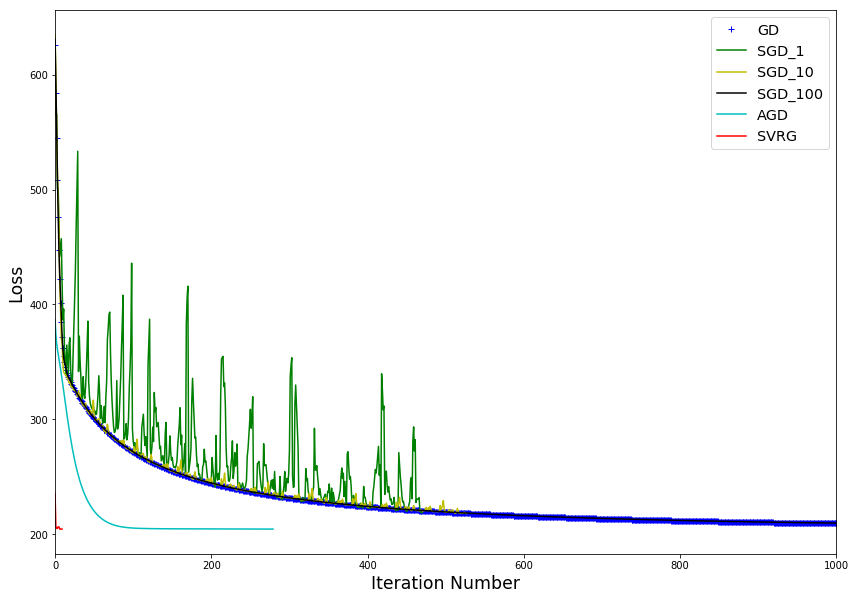

In [92]:
plt.figure(1, figsize=(14, 10))
plt.xlabel('Iteration Number',fontsize='xx-large')
plt.xlim(0,1000)
plt.ylabel('Loss',fontsize='xx-large')
plt.plot(wbc_gd_loss, '+' 'b')
plt.plot(wbc_sgd_1_loss, 'g')
plt.plot(wbc_sgd_10_loss, 'y')
plt.plot(wbc_sgd_100_loss, 'k')
plt.plot(wbc_agd_loss, 'c')
plt.plot(wbc_svrdg_loss, 'r')
plt.legend(['GD','SGD_1','SGD_10','SGD_100','AGD','SVRG'], fontsize='x-large')
plt.show()

#### MNIST Data
Then, we setup the run for all of our descent methods on the MNIST dataset, beginning with the initialization of each of our descent method objects. We combine the cells here and reduce the footprint, as the usage is the same as above.

In [28]:
lr = FixedRate(0.000001)
# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent() 
sgd_10 = GradientDescent()
sgd_100 = GradientDescent()
agd = NesterovAcceleratedDescent()
svrd = StochasticVarianceReducedGradientDescent()
# initialize the logisitic regression objects
gd_log = LogisticRegression(gd, lr, 2000, mnist_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr, 100, 1, rel_conv)
sgd_10_log = LogisticRegression(sgd_10, lr, 200, 10, rel_conv)
sgd_100_log = LogisticRegression(sgd_100, lr, 2000, 100, rel_conv)
agd_log = LogisticRegression(agd, lr, 200, mnist_n, rel_conv)
svrd_log = LogisticRegression(svrd, lr, 20, mnist_n, rel_conv)
# and run the fit for each of these models, this time on the MNIST data set:
print('Fitting gradient descent:')
mnist_gd_loss = gd_log.fit(mnist_X_train, mnist_y_train, non_zero_init = True)
print('\nFitting stochastic gradient descent, batch size = 1:')
mnist_sgd_1_loss = sgd_1_log.fit(mnist_X_train, mnist_y_train, non_zero_init = True)
print('\nFitting stochastic gradient descent, batch size = 10:')
mnist_sgd_10_loss = sgd_10_log.fit(mnist_X_train, mnist_y_train, non_zero_init = True)
print('\nFitting stochastic gradient descent, batch size = 100:')
mnist_sgd_100_loss = sgd_100_log.fit(mnist_X_train, mnist_y_train, non_zero_init = True)
print('\nFitting accelerated gradient descent:')
mnist_agd_loss = agd_log.fit(mnist_X_train, mnist_y_train, non_zero_init = True)
print('\nFitting stochastic variance reduced gradient descent:')
mnist_sbrd_loss = svrd_log.fit(mnist_X_train, mnist_y_train, non_zero_init = True)

Fitting gradient descent:
Iter:        0 train loss: nan
Iter:      100 train loss: 1198.863
Iter:      200 train loss: 937.926
Iter:      300 train loss: 803.098
Iter:      400 train loss: 712.975
Iter:      500 train loss: 647.400
Iter:      600 train loss: 597.177
Iter:      700 train loss: 557.304
Iter:      800 train loss: 524.790
Iter:      900 train loss: 497.734

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: nan
Converged at 78 iterations.

Fitting stochastic gradient descent, batch size = 10:
Iter:        0 train loss: nan
Converged at 142 iterations.

Fitting stochastic gradient descent, batch size = 100:
Iter:        0 train loss: nan
Iter:      200 train loss: 938.253
Iter:      400 train loss: 714.459
Iter:      600 train loss: 598.906
Iter:      800 train loss: 524.670
Iter:     1000 train loss: 474.808
Iter:     1200 train loss: 438.028
Converged at 1220 iterations.

Fitting accelerated gradient descent:
Iter:        0 train loss: 7138.0

#### COD-RNA Data
Lastly, we setup the run for all of our descent methods on the COD-RNA dataset, again using a reduced-frill cell to run our fit for each method's model.

In [18]:
lr = FixedRate(0.001)
# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent()
sgd_10 = GradientDescent()
sgd_100 = GradientDescent()
agd = NesterovAcceleratedDescent()
svrd = StochasticVarianceReducedGradientDescent()
# initialize the logisitic regression objects
gd_log = LogisticRegression(gd, lr, 5000, wbc_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr, 2000, 1, rel_conv)
sgd_10_log = LogisticRegression(sgd_10, lr, 2000, 10, rel_conv)
sgd_100_log = LogisticRegression(sgd_100, lr, 2000, 100, rel_conv)
agd_log = LogisticRegression(agd, lr, 200, wbc_n, rel_conv)
svrd_log = LogisticRegression(svrd, lr, 20, wbc_n, rel_conv)
# and run the fit for each of these models, this time on the MNIST data set:
print('Fitting gradient descent:')
wbc_gd_loss = gd_log.fit(wbc_X_train, wbc_y_train, non_zero_init = True)
print('\nFitting stochastic gradient descent, batch size = 1:')
wbc_sgd_1_loss = sgd_1_log.fit(wbc_X_train, wbc_y_train, non_zero_init = True)
print('\nFitting stochastic gradient descent, batch size = 10:')
wbc_sgd_10_loss = sgd_10_log.fit(wbc_X_train, wbc_y_train, non_zero_init = True)
print('\nFitting stochastic gradient descent, batch size = 100:')
wbc_sgd_100_loss = sgd_100_log.fit(wbc_X_train, wbc_y_train, non_zero_init = True)
print('\nFitting accelerated gradient descent:')
wbc_agd_loss = agd_log.fit(wbc_X_train, wbc_y_train, non_zero_init = True)
print('\nFitting stochastic variance reduced gradient descent:')
wbc_sbrd_loss = svrd_log.fit(wbc_X_train, wbc_y_train, non_zero_init = True)

Next, we initialize all of our model objects (all logistic regression models in this case), with the appropriate parameters for each algorithm.

In [19]:
# LogisticRegression(DescentAlgorithm, LearningRate, max iterations, 
# batch size, relative convergence)
gd_log = LogisticRegression(gd, lr, 5000, wbc_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr, 2000, 1, rel_conv)
sgd_10_log = LogisticRegression(sgd_10, lr, 2000, 10, rel_conv)
sgd_100_log = LogisticRegression(sgd_100, lr, 2000, 100, rel_conv)
agd_log = LogisticRegression(agd, lr, 200, wbc_n, rel_conv)
svrd_log = LogisticRegression(svrd, lr, 20, wbc_n, rel_conv)

Then, we run the fit for each model:

In [20]:
print('Fitting gradient descent:')
wbc_gd_loss = gd_log.fit(wbc_X_train, wbc_y_train, non_zero_init = True)
print('\nFitting stochastic gradient descent, batch size = 1:')
wbc_sgd_1_loss = sgd_1_log.fit(wbc_X_train, wbc_y_train, non_zero_init = True)
print('\nFitting stochastic gradient descent, batch size = 10:')
wbc_sgd_10_loss = sgd_10_log.fit(wbc_X_train, wbc_y_train, non_zero_init = True)
print('\nFitting stochastic gradient descent, batch size = 100:')
wbc_sgd_100_loss = sgd_100_log.fit(wbc_X_train, wbc_y_train, non_zero_init = True)
print('\nFitting accelerated gradient descent:')
wbc_agd_loss = agd_log.fit(wbc_X_train, wbc_y_train, non_zero_init = True)
print('\nFitting stochastic variance reduced gradient descent:')
wbc_sbrd_loss = svrd_log.fit(wbc_X_train, wbc_y_train, non_zero_init = True)

Fitting gradient descent:
Iter:        0 train loss: 643.546
Iter:      500 train loss: 222.831
Iter:     1000 train loss: 212.815
Iter:     1500 train loss: 209.672
Iter:     2000 train loss: 208.339
Iter:     2500 train loss: 207.696
Iter:     3000 train loss: 207.366
Iter:     3500 train loss: 207.190
Converged at 3666 iterations.

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 651.741
Iter:      200 train loss: 288.112
Iter:      400 train loss: 251.989
Iter:      600 train loss: 219.381
Iter:      800 train loss: 217.956
Iter:     1000 train loss: 258.056
Iter:     1200 train loss: 214.006
Converged at 1255 iterations.

Fitting stochastic gradient descent, batch size = 10:
Iter:        0 train loss: 667.279
Iter:      200 train loss: 249.538
Iter:      400 train loss: 227.446
Iter:      600 train loss: 219.625
Iter:      800 train loss: 215.234
Iter:     1000 train loss: 212.944
Iter:     1200 train loss: 212.197
Iter:     1400 train loss: 210.517


In [ ]:
acc = check_accuracy(log, wbc_X_test, wbc_y_test)
print("Model Accuracy: {0:.2f}%".format(acc * 100))

plt.figure(1, figsize=(12, 6))
plt.title('Loss Plot')
plt.xlabel('Iteration Number')
plt.ylabel('Loss')
plt.plot(loss, 'b')
plt.show()

Run notes:

FIRST:
lr:
    - fixed: GD(0.01), SGD(0.01) - batched at 1,10,100 , SVRG(0.01), Nest(0.01)
    - polydecay: GD(0.01, 0.0001), SGD(0.01, 0.00001) - batched, SVRG(N/A), Nest(N/A)
    - expdecay: GD(0.1,0.001), SGD(0.1,.001) - batched, SVRG(N/A), Nest(N/A)